In [ ]:
"""Code snippets have been referenced from https://www.datacamp.com/community/tutorials/scikit-learn-fake-news"""

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer


In [2]:
import itertools

In [3]:
from matplotlib import pyplot as plt


In [4]:

df = pd.read_csv("fake_or_real_news-2.csv")

    
# checking the head of dataframe
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# shape of df
df.shape

(6335, 4)

In [6]:
df = df.set_index("Unnamed: 0")
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df.columns = ["title","text","label"]

In [8]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [9]:
# Set `y` 
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['title'], y, test_size=0.20, random_state=53)

In [10]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [11]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['zip', 'zone', 'zuckerberg', 'zuesse', 'zulu', 'вам', 'праздником', 'ребята', 'спасибо', 'القادمون']
['00', '000', '00pm', '01', '04', '05', '08', '10', '100', '1000s']


In [13]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['zip', 'zone', 'zuckerberg', 'zuesse', 'zulu', 'вам', 'праздником', 'ребята', 'спасибо', 'القادمون']


In [14]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [15]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [16]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [17]:
print(count_df.equals(tfidf_df))

False


In [18]:
count_df.head()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zip,zone,zuckerberg,zuesse,zulu,вам,праздником,ребята,спасибо,القادمون
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tfidf_df.head()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zip,zone,zuckerberg,zuesse,zulu,вам,праздником,ребята,спасибо,القادمون
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [22]:
clf = MultinomialNB() 

accuracy:   0.813
Confusion matrix, without normalization


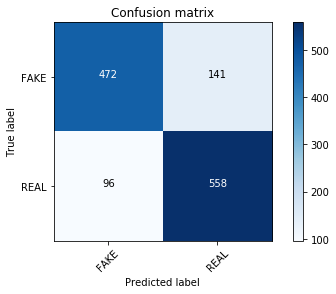

In [23]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [24]:
clf = MultinomialNB() 

accuracy:   0.811
Confusion matrix, without normalization


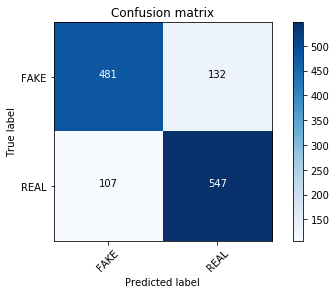

In [25]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [27]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.784
Confusion matrix, without normalization


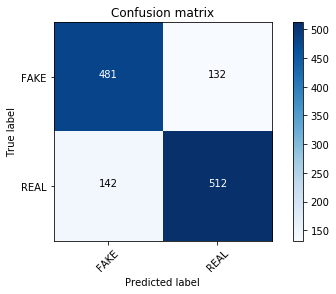

In [28]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
clf = MultinomialNB(alpha=0.1)

In [30]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.74980
Alpha: 0.10 Score: 0.79242
Alpha: 0.20 Score: 0.79637
Alpha: 0.30 Score: 0.80110
Alpha: 0.40 Score: 0.80268
Alpha: 0.50 Score: 0.80663
Alpha: 0.60 Score: 0.80584
Alpha: 0.70 Score: 0.80821
Alpha: 0.80 Score: 0.80979
Alpha: 0.90 Score: 0.81137


/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [31]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.478533753477346 breaking
FAKE -4.7759893016815 mosul
FAKE -4.594678330631901 comment
FAKE -4.56461616264668 reopening
FAKE -4.533149380573211 tolerate
FAKE -4.334644160203302 podesta
FAKE -3.847857343214832 aleppo
FAKE -3.845633077360122 raqqa
FAKE -3.752577254619403 soros
FAKE -3.7386460190050057 truthfeed
FAKE -3.6269703657027357 relative
FAKE -3.6049595987627465 favor
FAKE -3.593949422850079 privacy
FAKE -3.592800336587472 gave
FAKE -3.5410858110738532 cheat
FAKE -3.5316806194888386 circulated
FAKE -3.4848436411586254 germany
FAKE -3.4740846006449893 elected
FAKE -3.3711484279082367 working
FAKE -3.3553170435752953 fighters
FAKE -3.3545265738852126 information
FAKE -3.351045342029111 voter
FAKE -3.333308994520064 hillary
FAKE -3.308690007290438 noncitizen
FAKE -3.2584222150928706 stolen
FAKE -3.256292738643437 funded
FAKE -3.249158167015984 effects
FAKE -3.233701886246069 tell
FAKE -3.221075095648744 photo
FAKE -3.2155392901409585 putin

REAL 5.2742435490481565 netanyahu
REA

In [32]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [33]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.781
Confusion matrix, without normalization


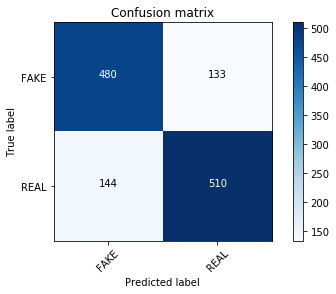

In [34]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
clf = MultinomialNB(alpha=.90)

accuracy:   0.814
Confusion matrix, without normalization


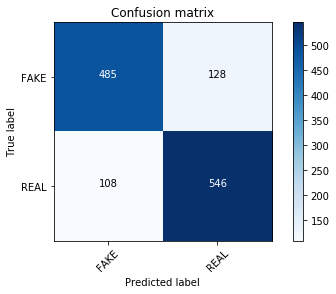

In [36]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [38]:
df_a = pd.read_csv("awetest2.csv")
df_a = df_a[0:10]
df_a = df_a.set_index("X")
y_a = df_a.label 

# Drop the `label` column
df_a.drop("label", axis=1)

# Make training and test sets 
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df_a['title'], y_a, test_size=0,random_state=1)


test_me = hash_vectorizer.transform(X_train_a)
pred = clf.predict(test_me)
score = accuracy_score(y_train_a, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.600


/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [39]:
X_train_a

X
3     My mom took that picture in August when we wer...
10    Ford Motor CEO Says Trump Is Lying AGAIN! Comp...
7     State Of Minnesota Has Just Handed Over FULL C...
5     BREAKING: Barrels Removed From Clinton Propert...
1     What happens when you give 4chan Pictures of t...
4     A picture someone took of a shark swimming by ...
2     New photo of what seems to be Boston bombing s...
8     KISS' Gene Simmons: "You Want to Win the War o...
9     Kerry says Syrian diplomacy at impasse after t...
6     BREAKING: Johnny Depp Taken Into Custody By Se...
Name: title, dtype: object

In [40]:
pred

array(['FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE',
       'REAL', 'FAKE'], dtype='<U4')